## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

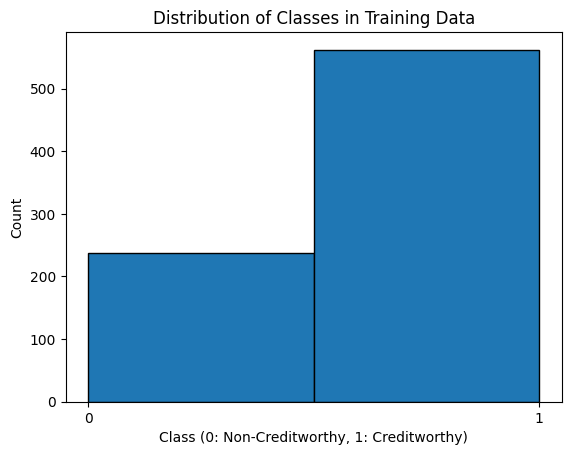

In [10]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [70]:
"""
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap
    )
    
    # Кросс-валидация для оценки модели
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score

# Инициализация и запуск Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=3)
print("Лучшие параметры:", study.best_params)
print("Наилучшее значение метрики ROC AUC:", study.best_value)


def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    subsample = trial.suggest_uniform('subsample', 0.6, 1.0)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
    )
    
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=3)
print("Лучшие параметры:", study.best_params)
print("Наилучшее значение ROC AUC:", study.best_value)
"""

'\nimport optuna\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.ensemble import GradientBoostingClassifier\n\ndef objective(trial):\n    n_estimators = trial.suggest_int(\'n_estimators\', 100, 1000)\n    max_depth = trial.suggest_int(\'max_depth\', 10, 50)\n    min_samples_split = trial.suggest_int(\'min_samples_split\', 2, 10)\n    min_samples_leaf = trial.suggest_int(\'min_samples_leaf\', 1, 4)\n    bootstrap = trial.suggest_categorical(\'bootstrap\', [True, False])\n    \n    model = RandomForestClassifier(\n        n_estimators=n_estimators,\n        max_depth=max_depth,\n        min_samples_split=min_samples_split,\n        min_samples_leaf=min_samples_leaf,\n        bootstrap=bootstrap\n    )\n    \n    # Кросс-валидация для оценки модели\n    score = cross_val_score(model, X_train, y_train, cv=5, scoring=\'roc_auc\').mean()\n    return score\n\n# Инициализация и запуск Optuna\nstudy = optuna.create_study(di

In [71]:
"""
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Диапазон значений гиперпараметров
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    random_state=42
)

rf_random_search.fit(X_train, y_train)
print("Лучшие параметры Random Forest:", rf_random_search.best_params_)
print("ROC AUC после оптимизации:", rf_random_search.best_score_)
"""




'\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import randint\n\n# Диапазон значений гиперпараметров\nparam_dist_rf = {\n    \'n_estimators\': randint(100, 500),\n    \'max_depth\': randint(5, 20),\n    \'min_samples_split\': randint(2, 10),\n    \'min_samples_leaf\': randint(1, 4),\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']\n}\n\nrf_random_search = RandomizedSearchCV(\n    estimator=RandomForestClassifier(random_state=42),\n    param_distributions=param_dist_rf,\n    n_iter=50,\n    cv=5,\n    scoring=\'roc_auc\',\n    random_state=42\n)\n\nrf_random_search.fit(X_train, y_train)\nprint("Лучшие параметры Random Forest:", rf_random_search.best_params_)\nprint("ROC AUC после оптимизации:", rf_random_search.best_score_)\n'

In [72]:
"""
param_dist_gb = {
    'n_estimators': randint(100, 500),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': randint(3, 10),
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

gb_random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist_gb,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    random_state=42
)

gb_random_search.fit(X_train, y_train)
print("Лучшие параметры Gradient Boosting:", gb_random_search.best_params_)
print("ROC AUC после оптимизации:", gb_random_search.best_score_)
"""

'\nparam_dist_gb = {\n    \'n_estimators\': randint(100, 500),\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'max_depth\': randint(3, 10),\n    \'subsample\': [0.6, 0.8, 1.0],\n    \'min_samples_split\': randint(2, 10),\n    \'min_samples_leaf\': randint(1, 4)\n}\n\ngb_random_search = RandomizedSearchCV(\n    estimator=GradientBoostingClassifier(random_state=42),\n    param_distributions=param_dist_gb,\n    n_iter=50,\n    cv=5,\n    scoring=\'roc_auc\',\n    random_state=42\n)\n\ngb_random_search.fit(X_train, y_train)\nprint("Лучшие параметры Gradient Boosting:", gb_random_search.best_params_)\nprint("ROC AUC после оптимизации:", gb_random_search.best_score_)\n'

In [73]:
"""
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 500, 1000]
}

mlp_random_search = RandomizedSearchCV(
    estimator=MLPClassifier(random_state=42),
    param_distributions=param_dist_mlp,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    random_state=42
)

mlp_random_search.fit(X_train, y_train)
print("Лучшие параметры MLPClassifier:", mlp_random_search.best_params_)
print("ROC AUC после оптимизации:", mlp_random_search.best_score_)
"""

'\nparam_dist_mlp = {\n    \'hidden_layer_sizes\': [(50,), (100,), (50, 50), (100, 50)],\n    \'learning_rate_init\': [0.001, 0.01, 0.1],\n    \'alpha\': [0.0001, 0.001, 0.01],\n    \'max_iter\': [200, 500, 1000]\n}\n\nmlp_random_search = RandomizedSearchCV(\n    estimator=MLPClassifier(random_state=42),\n    param_distributions=param_dist_mlp,\n    n_iter=20,\n    cv=5,\n    scoring=\'roc_auc\',\n    random_state=42\n)\n\nmlp_random_search.fit(X_train, y_train)\nprint("Лучшие параметры MLPClassifier:", mlp_random_search.best_params_)\nprint("ROC AUC после оптимизации:", mlp_random_search.best_score_)\n'

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Определение параметров и их значений для перебора
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# Создание модели и настройка с использованием решетчатого поиска
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Вывод наилучших гиперпараметров и оценки
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 50}
Best Cross-Validation Score: 0.7775000000000001


In [22]:
# Финальная модель RandomForestClassifier с оптимизированными гиперпараметрами
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30, 40, 50])
    min_samples_leaf = trial.suggest_categorical('min_samples_leaf', [1, 2, 4])

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    score = cross_val_score(model, X_train, y_train, cv=5).mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_score = study.best_value
rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Обучение модели с оптимизированными гиперпараметрами
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Расчет метрик для оптимизированного Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Оптимизированные метрики для Random Forest:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

[I 2024-10-29 15:02:07,181] A new study created in memory with name: no-name-d665c54c-4efb-4043-83e8-27edd587a6cc


[I 2024-10-29 15:02:10,241] Trial 0 finished with value: 0.7725 and parameters: {'n_estimators': 149, 'max_depth': 20, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7725.
[I 2024-10-29 15:02:12,216] Trial 1 finished with value: 0.7675 and parameters: {'n_estimators': 114, 'max_depth': 20, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.7725.
[I 2024-10-29 15:02:14,294] Trial 2 finished with value: 0.7762499999999999 and parameters: {'n_estimators': 107, 'max_depth': 50, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.7762499999999999.
[I 2024-10-29 15:02:15,895] Trial 3 finished with value: 0.77125 and parameters: {'n_estimators': 79, 'max_depth': 30, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.7762499999999999.
[I 2024-10-29 15:02:17,204] Trial 4 finished with value: 0.76125 and parameters: {'n_estimators': 78, 'max_depth': 10, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.7762499999999999.
[I 2024-10-29 15:02:18,523] Trial 5 finished with value: 

Оптимизированные метрики для Random Forest:
ROC AUC: 0.69
Accuracy: 0.77
Precision: 0.79
Recall: 0.90


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
import optuna
from sklearn.model_selection import cross_val_score
# Определение целевой функции для Gradient Boosting
def objective_gb(trial):
    # Параметры, которые будем оптимизировать
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

    # Определение модели с текущими параметрами
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    # Кросс-валидация для оценки качества модели
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score

# Создание и оптимизация исследования для GradientBoostingClassifier
study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective_gb, n_trials=100)

# Лучшие параметры и значение метрики
best_params_gb = study_gb.best_params
best_score_gb = study_gb.best_value
print("Лучшие параметры для GradientBoostingClassifier:", best_params_gb)
print("Лучший ROC AUC для GradientBoostingClassifier:", best_score_gb)

gb_model = GradientBoostingClassifier(
    n_estimators=best_params_gb['n_estimators'],
    learning_rate=best_params_gb['learning_rate'],
    max_depth=best_params_gb['max_depth'],
    min_samples_leaf=best_params_gb['min_samples_leaf'],
    random_state=42
)

# Обучение оптимизированной Gradient Boosting модели
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для оптимизированной Gradient Boosting модели
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nОптимизированные метрики для Gradient Boosting:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

[I 2024-10-29 15:10:39,257] A new study created in memory with name: no-name-8ac4f711-db4e-4001-913e-62acfdd1c30e


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6632\3396910207.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
[I 2024-10-29 15:10:49,359] Trial 0 finished with value: 0.7856437615999139 and parameters: {'n_estimators': 167, 'learning_rate': 0.040670991264928145, 'max_depth': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.7856437615999139.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6632\3396910207.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
[I 2024-10-29 15:10:52,755] Trial 1 finished with value: 0.7809497541602782

Лучшие параметры для GradientBoostingClassifier: {'n_estimators': 139, 'learning_rate': 0.040181890136200826, 'max_depth': 3, 'min_samples_leaf': 4}
Лучший ROC AUC для GradientBoostingClassifier: 0.7905695011364553

Оптимизированные метрики для Gradient Boosting:
ROC AUC: 0.65
Accuracy: 0.73
Precision: 0.78
Recall: 0.86


In [25]:
import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Определение целевой функции для MLP
def objective_mlp(trial):
    # Параметры, которые будем оптимизировать
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 50), (100, 100)])
    learning_rate_init = trial.suggest_loguniform('learning_rate_init', 1e-4, 1e-1)
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-2)
    max_iter = trial.suggest_categorical('max_iter', [200, 500, 1000])

    # Определение модели с текущими параметрами
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        learning_rate_init=learning_rate_init,
        alpha=alpha,
        max_iter=max_iter,
        random_state=42
    )
    # Кросс-валидация для оценки качества модели
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score

# Создание и оптимизация исследования для MLPClassifier
study_mlp = optuna.create_study(direction='maximize')
study_mlp.optimize(objective_mlp, n_trials=100)

# Лучшие параметры и значение метрики
best_params_mlp = study_mlp.best_params
best_score_mlp = study_mlp.best_value
print("Лучшие параметры для MLPClassifier:", best_params_mlp)
print("Лучший ROC AUC для MLPClassifier:", best_score_mlp)

mlp_model = MLPClassifier(
    hidden_layer_sizes=best_params_mlp['hidden_layer_sizes'],
    learning_rate_init=best_params_mlp['learning_rate_init'],
    alpha=best_params_mlp['alpha'],
    max_iter=best_params_mlp['max_iter'],
    random_state=42
)

# Обучение оптимизированной MLP модели
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)

# Расчет метрик для оптимизированной MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nОптимизированные метрики для MLP (Neural Network):")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")

[I 2024-10-29 15:20:04,986] A new study created in memory with name: no-name-1c954c9a-77c6-4cd0-a786-096fb86171c3
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\optuna\distributions

Лучшие параметры для MLPClassifier: {'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.00012831432623923927, 'alpha': 0.00039212240057051714, 'max_iter': 500}
Лучший ROC AUC для MLPClassifier: 0.6759505344926523

Оптимизированные метрики для MLP (Neural Network):
ROC AUC: 0.53
Accuracy: 0.70
Precision: 0.70
Recall: 0.99


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели